In [1]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os
from tensorflow import keras
from sklearn.metrics import mean_squared_error

#setting random state for reproducible results
np.random.seed(42)

from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# DATA PREPROCESSING

In [4]:
import datetime
df['Refined_data'] = df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x))
col = df.pop("Refined_data")
df.insert(0, "Refined_data", col)
df = df.set_index('Refined_data')

In [5]:
resampled_df = pd.DataFrame() 
resampled_df=df.resample('H').mean()
resampled_df=resampled_df.drop(['DATE'], axis=1)

In [6]:
resampled_df= resampled_df.dropna() 

# STOCKS CLUSTERING

In [7]:
cor = resampled_df.corr()

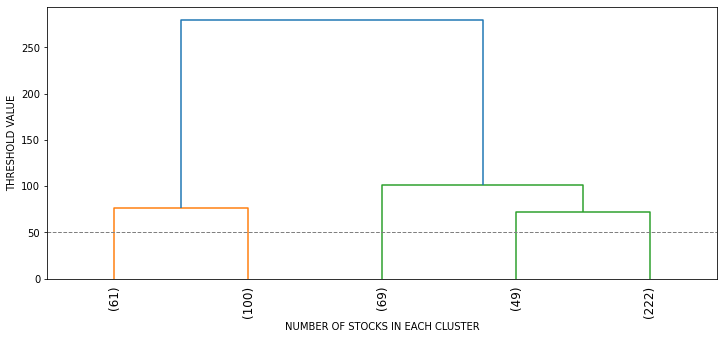

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
Z = linkage(cor , 'ward')

dendrogram(Z, labels=resampled_df.columns , orientation='top', truncate_mode = 'lastp', p=5,
           leaf_rotation=90)
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.xlabel("NUMBER OF STOCKS IN EACH CLUSTER")
plt.ylabel("THRESHOLD VALUE")
# Show the graph
plt.show()

In [9]:
# Clusterize the data
threshold = 50
labels = fcluster(Z,threshold,  criterion='distance')

clustered_stocks = {}
for stock, cluster in zip(resampled_df.columns, labels):
    if cluster not in clustered_stocks:
        clustered_stocks[cluster] = [stock]
    else:
        clustered_stocks[cluster].append(stock)


In [10]:
cluster1 = clustered_stocks.get(1)
cluster2 = clustered_stocks.get(2)
cluster3 = clustered_stocks.get(3)
cluster4 = clustered_stocks.get(4)
cluster5 = clustered_stocks.get(5)
data = {'cluster_1','cluster_2','cluster_3','cluster_4','cluster_5'} 
stock_clusters = pd.DataFrame(data)
stock_group = [cluster1,cluster2,cluster3,cluster4,cluster5]
stock_clusters['Stocks'] = stock_group

In [ ]:
stock_clusters.to_csv('stock_clusters.csv')

# TIME SERIES FORECASTING

In [11]:
resampled_df_new = pd.DataFrame() 
resampled_df_new=resampled_df[['SP500', 'NASDAQ.AAL','NASDAQ.ADI', 'NASDAQ.AKAM', 'NASDAQ.DISH']]

In [12]:
resampled_df_arima = pd.DataFrame() 
resampled_df_arima=resampled_df[['SP500', 'NASDAQ.AAL','NASDAQ.ADI', 'NASDAQ.AKAM', 'NASDAQ.DISH']]

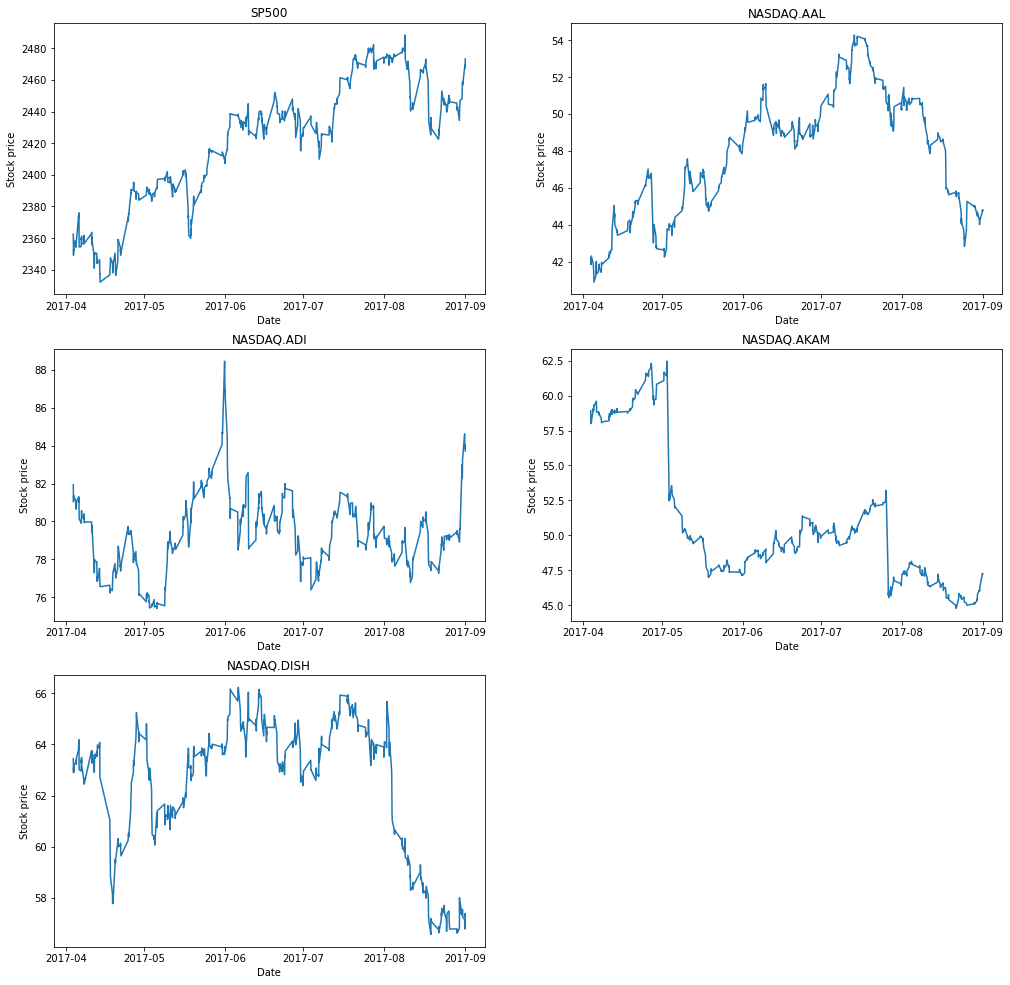

In [13]:
#plot
figure, axis = plt.subplots(3, 2,  figsize=(17, 17)) 

axis[0, 0].plot(resampled_df_new['SP500'])
axis[0, 0].set_title("SP500") 
axis[0, 0].set(xlabel="Date") 
axis[0, 0].set(ylabel="Stock price") 
  
axis[0, 1].plot(resampled_df_new['NASDAQ.AAL']) 
axis[0, 1].set_title("NASDAQ.AAL") 
axis[0, 1].set(xlabel="Date") 
axis[0, 1].set(ylabel="Stock price") 
  
axis[1, 0].plot(resampled_df_new['NASDAQ.ADI']) 
axis[1, 0].set_title("NASDAQ.ADI") 
axis[1, 0].set(xlabel="Date") 
axis[1, 0].set(ylabel="Stock price") 
  
axis[1, 1].plot(resampled_df_new['NASDAQ.AKAM']) 
axis[1, 1].set_title("NASDAQ.AKAM") 
axis[1, 1].set(xlabel="Date") 
axis[1, 1].set(ylabel="Stock price") 

axis[2, 0].plot(resampled_df_new['NASDAQ.DISH']) 
axis[2, 0].set_title("NASDAQ.DISH") 
axis[2, 0].set(xlabel="Date") 
axis[2, 0].set(ylabel="Stock price") 

axis[2][1].set_visible(False)

plt.show() 

In [14]:
scaler_SP = MinMaxScaler()
scaler_AAL = MinMaxScaler()
scaler_ADI = MinMaxScaler()
scaler_AKAM = MinMaxScaler()
scaler_DISH = MinMaxScaler()
resampled_df_new['SP500'] = scaler_SP.fit_transform(resampled_df_new['SP500'].values.reshape(-1, 1))
resampled_df_new['NASDAQ.AAL'] = scaler_AAL.fit_transform(resampled_df_new['NASDAQ.AAL'].values.reshape(-1, 1))
resampled_df_new['NASDAQ.ADI'] = scaler_ADI.fit_transform(resampled_df_new['NASDAQ.ADI'].values.reshape(-1, 1))
resampled_df_new['NASDAQ.AKAM'] = scaler_AKAM.fit_transform(resampled_df_new['NASDAQ.AKAM'].values.reshape(-1, 1))
resampled_df_new['NASDAQ.DISH'] = scaler_DISH.fit_transform(resampled_df_new['NASDAQ.DISH'].values.reshape(-1, 1))

C:\Users\Dell\AppData\Local\Temp/ipykernel_22160/1748256441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_df_new['SP500'] = scaler_SP.fit_transform(resampled_df_new['SP500'].values.reshape(-1, 1))
C:\Users\Dell\AppData\Local\Temp/ipykernel_22160/1748256441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_df_new['NASDAQ.AAL'] = scaler_AAL.fit_transform(resampled_df_new['NASDAQ.AAL'].values.reshape(-1, 1))
C:\Users\Dell\AppData\Local\Temp/ipykernel_22160/1748256441.py:8: SettingWi

In [15]:
len_train = int(len(resampled_df_new) * 0.8)
len_test = len(resampled_df_new) - len_train
train, test = resampled_df_new.iloc[0:len_train], resampled_df_new.iloc[len_train:len(resampled_df_new)]

In [16]:
len_train_arima = int(len(resampled_df_arima) * 0.8)
len_test_arima = len(resampled_df_arima) - len_train_arima
train_arima, test_arima = resampled_df_arima.iloc[0:len_train_arima], resampled_df_arima.iloc[len_train_arima:len(resampled_df_arima)]

# SP500

In [17]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 12
trainX_SP, trainY_SP = gen_data(train['SP500'], train['SP500'], num_steps)
testX_SP, testY_SP = gen_data(test['SP500'], test['SP500'], num_steps)

In [18]:
n_features = 1
trainX_SP = trainX_SP.reshape((trainX_SP.shape[0], trainX_SP.shape[1], n_features))
testX_SP = testX_SP.reshape((testX_SP.shape[0], testX_SP.shape[1], n_features))

## LSTM MODEL

In [19]:
lstm_model_SP = keras.Sequential()
lstm_model_SP.add(keras.layers.LSTM(1024,input_shape=(12,1)))
lstm_model_SP.add(keras.layers.Dense(1))
lstm_model_SP.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [20]:
history_SP = lstm_model_SP.fit(trainX_SP, trainY_SP, epochs=50, validation_split=0.2,
    batch_size=10, 
    shuffle=False
)

Epoch 1/50
47/47 [==============================] - 23s 376ms/step - loss: 0.0108 - val_loss: 0.0065
Epoch 2/50
47/47 [==============================] - 15s 313ms/step - loss: 0.0078 - val_loss: 0.0163
Epoch 3/50
47/47 [==============================] - 14s 303ms/step - loss: 0.0093 - val_loss: 0.0230
Epoch 4/50
47/47 [==============================] - 15s 321ms/step - loss: 0.0100 - val_loss: 0.0332
Epoch 5/50
47/47 [==============================] - 15s 312ms/step - loss: 0.0069 - val_loss: 0.0178
Epoch 6/50
47/47 [==============================] - 17s 370ms/step - loss: 0.0065 - val_loss: 0.0245
Epoch 7/50
47/47 [==============================] - 16s 342ms/step - loss: 0.0051 - val_loss: 0.0176
Epoch 8/50
47/47 [==============================] - 16s 346ms/step - loss: 0.0045 - val_loss: 0.0102
Epoch 9/50
47/47 [==============================] - 16s 331ms/step - loss: 0.0038 - val_loss: 0.0084
Epoch 10/50
47/47 [==============================] - 15s 322ms/step - loss: 0.0034 - val_lo

In [21]:
y_pred_SP=lstm_model_SP.predict(testX_SP)

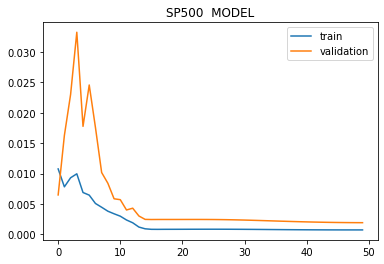

In [22]:
plt.plot(history_SP.history['loss'], label='train')
plt.plot(history_SP.history['val_loss'], label='validation')
plt.title("SP500  MODEL") 
plt.legend();

In [23]:
inversed_y_pred_SP = scaler_SP.inverse_transform(y_pred_SP.reshape(-1, 1))
inversed_testY_SP= scaler_SP.inverse_transform(testY_SP.reshape(-1, 1))

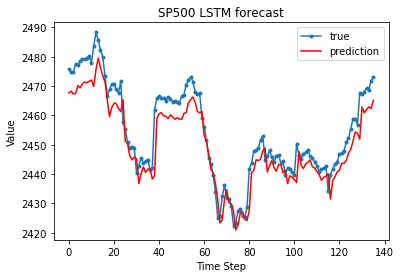

In [25]:
plt.plot(inversed_testY_SP, marker='.', label="true")
plt.plot(inversed_y_pred_SP, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("SP500 LSTM forecast") 
plt.legend()
plt.show();

In [26]:
rmse_SP= np.sqrt(mean_squared_error(inversed_testY_SP, inversed_y_pred_SP))

## ARIMA MODEL

In [28]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(resampled_df_new['SP500'].diff().dropna())

ADF Test Statistic : -8.753063882265707
p-value : 2.8025189136950406e-14
#Lags Used : 13
Number of Observations : 724
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [29]:
from statsmodels.tsa.arima.model import ARIMA
model_SP=ARIMA(train_arima['SP500'],order=(1,2,1))
model_fit_SP=model_SP.fit()
model_fit_SP.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SP500   No. Observations:                  591
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1563.067
Date:                Fri, 20 Oct 2023   AIC                           3132.135
Time:                        01:37:13   BIC                           3145.270
Sample:                             0   HQIC                          3137.252
                                - 591                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0967      0.041      2.332      0.020       0.015       0.178
ma.L1         -0.9999      0.699     -1.430      0.153      -2.371       0.371
sigma2        11.6963      8.131      1.438      0.150      -4.241      27.634
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1931.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.20
Prob(H) (two-sided):                  0.18   Kurtosis:                        11.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
history_SP = [x for x in train_arima['SP500']]
# rolling forecasts
predictions_SP = list()
for i in range(len(test_arima['SP500'])):
    # predict
    model_SP = ARIMA(history_SP, order=(1,1,1))
    model_fit_SP = model_SP.fit()
    yhat = model_fit_SP.forecast()[0]
    # invert transformed prediction
    predictions_SP.append(yhat)
    # observation
    obs = test_arima['SP500'][i]
    history_SP.append(obs)

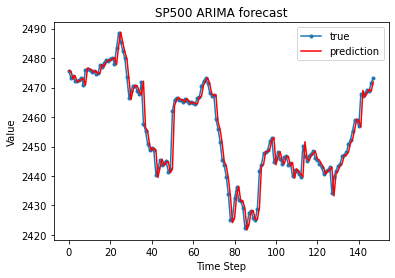

In [32]:
plt.plot(test_arima['SP500'].values, marker='.', label="true")
plt.plot(predictions_SP, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("SP500 ARIMA forecast") 
plt.legend()
plt.show();

In [33]:
rmse_arima_SP= np.sqrt(mean_squared_error(test_arima['SP500'], predictions_SP))

# NASDAQ.AAL

In [35]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 12
trainX_AAL, trainY_AAL = gen_data(train['NASDAQ.AAL'], train['NASDAQ.AAL'], num_steps)
testX_AAL, testY_AAL = gen_data(test['NASDAQ.AAL'], test['NASDAQ.AAL'], num_steps)

In [36]:
n_features = 1
trainX_AAL = trainX_AAL.reshape((trainX_AAL.shape[0], trainX_AAL.shape[1], n_features))
testX_AAL = testX_AAL.reshape((testX_AAL.shape[0], testX_AAL.shape[1], n_features))

## LSTM MODEL

In [37]:
lstm_model_AAL = keras.Sequential()
lstm_model_AAL.add(keras.layers.LSTM(1024,input_shape=(12,1)))
lstm_model_AAL.add(keras.layers.Dense(1))
lstm_model_AAL.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [38]:
history_AAL = lstm_model_AAL.fit(trainX_AAL, trainY_AAL, epochs=50, validation_split=0.2,
    batch_size=10, 
    shuffle=False
)

Epoch 1/50
47/47 [==============================] - 26s 421ms/step - loss: 0.0126 - val_loss: 0.0024
Epoch 2/50
47/47 [==============================] - 19s 410ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 3/50
47/47 [==============================] - 19s 411ms/step - loss: 0.0068 - val_loss: 0.0102
Epoch 4/50
47/47 [==============================] - 19s 400ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 5/50
47/47 [==============================] - 17s 364ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 6/50
47/47 [==============================] - 16s 337ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 7/50
47/47 [==============================] - 16s 342ms/step - loss: 0.0036 - val_loss: 0.0083
Epoch 8/50
47/47 [==============================] - 16s 351ms/step - loss: 0.0041 - val_loss: 0.0148
Epoch 9/50
47/47 [==============================] - 19s 408ms/step - loss: 0.0043 - val_loss: 0.0120
Epoch 10/50
47/47 [==============================] - 19s 413ms/step - loss: 0.0036 - val_lo

In [39]:
y_pred_AAL=lstm_model_AAL.predict(testX_AAL)

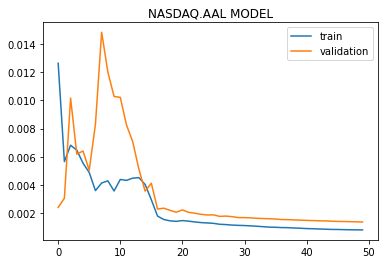

In [40]:
plt.plot(history_AAL.history['loss'], label='train')
plt.plot(history_AAL.history['val_loss'], label='validation')
plt.title("NASDAQ.AAL MODEL") 
plt.legend();

In [41]:
inversed_y_pred_AAL = scaler_AAL.inverse_transform(y_pred_AAL.reshape(-1, 1))
inversed_testY_AAL= scaler_AAL.inverse_transform(testY_AAL.reshape(-1, 1))

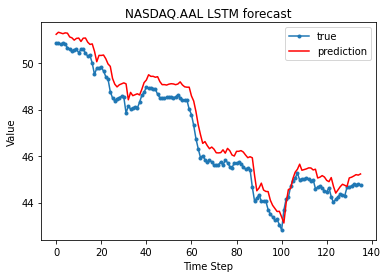

In [42]:
plt.plot(inversed_testY_AAL, marker='.', label="true")
plt.plot(inversed_y_pred_AAL, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.AAL LSTM forecast") 
plt.legend()
plt.show();

In [43]:
rmse_AAL= np.sqrt(mean_squared_error(inversed_testY_AAL, inversed_y_pred_AAL))

## ARIMA MODEL

In [45]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(resampled_df_new['NASDAQ.AAL'].diff().dropna())

ADF Test Statistic : -9.103040503893883
p-value : 3.562913762745737e-15
#Lags Used : 6
Number of Observations : 731
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [46]:
from statsmodels.tsa.arima.model import ARIMA
model_AAL=ARIMA(train_arima['NASDAQ.AAL'],order=(1,2,1))
model_fit_AAL=model_AAL.fit()
model_fit_AAL.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             NASDAQ.AAL   No. Observations:                  591
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -136.869
Date:                Fri, 20 Oct 2023   AIC                            279.738
Time:                        01:59:48   BIC                            292.873
Sample:                             0   HQIC                           284.855
                                - 591                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0668      0.038      1.740      0.082      -0.008       0.142
ma.L1         -0.9998      0.170     -5.877      0.000      -1.333      -0.666
sigma2         0.0922      0.016      5.944      0.000       0.062       0.123
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             32539.26
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -2.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
history_AAL = [x for x in train_arima['NASDAQ.AAL']]
# rolling forecasts
predictions_AAL = list()
for i in range(len(test_arima['NASDAQ.AAL'])):
    # predict
    model_AAL = ARIMA(history_AAL, order=(1,1,1))
    model_fit_AAL = model_AAL.fit()
    yhat = model_fit_AAL.forecast()[0]
    # invert transformed prediction
    predictions_AAL.append(yhat)
    # observation
    obs = test_arima['NASDAQ.AAL'][i]
    history_AAL.append(obs)

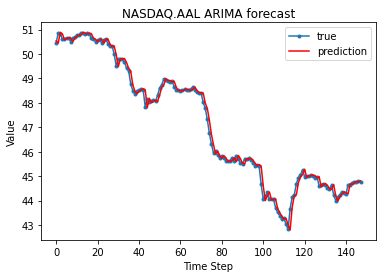

In [48]:
plt.plot(test_arima['NASDAQ.AAL'].values, marker='.', label="true")
plt.plot(predictions_AAL, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.AAL ARIMA forecast") 
plt.legend()
plt.show();

In [49]:
rmse_arima_AAL= np.sqrt(mean_squared_error(test_arima['NASDAQ.AAL'], predictions_AAL))

# NASDAQ.ADI

In [51]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 12
trainX_ADI, trainY_ADI = gen_data(train['NASDAQ.ADI'], train['NASDAQ.ADI'], num_steps)
testX_ADI, testY_ADI = gen_data(test['NASDAQ.ADI'], test['NASDAQ.ADI'], num_steps)

In [52]:
n_features = 1
trainX_ADI = trainX_ADI.reshape((trainX_ADI.shape[0], trainX_ADI.shape[1], n_features))
testX_ADI = testX_ADI.reshape((testX_ADI.shape[0], testX_ADI.shape[1], n_features))

## LSTM MODEL

In [53]:
lstm_model_ADI = keras.Sequential()
lstm_model_ADI.add(keras.layers.LSTM(1024,input_shape=(12,1)))
lstm_model_ADI.add(keras.layers.Dense(1))
lstm_model_ADI.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [54]:
history_ADI = lstm_model_ADI.fit(trainX_ADI, trainY_ADI, epochs=50, validation_split=0.2,
    batch_size=10, 
    shuffle=False
)

Epoch 1/50
47/47 [==============================] - 24s 315ms/step - loss: 0.0193 - val_loss: 0.0099
Epoch 2/50
47/47 [==============================] - 10s 206ms/step - loss: 0.0113 - val_loss: 0.0360
Epoch 3/50
47/47 [==============================] - 7s 140ms/step - loss: 0.0236 - val_loss: 0.0116
Epoch 4/50
47/47 [==============================] - 7s 154ms/step - loss: 0.0156 - val_loss: 0.0039
Epoch 5/50
47/47 [==============================] - 6s 130ms/step - loss: 0.0132 - val_loss: 0.0056
Epoch 6/50
47/47 [==============================] - 6s 120ms/step - loss: 0.0103 - val_loss: 0.0037
Epoch 7/50
47/47 [==============================] - 6s 126ms/step - loss: 0.0093 - val_loss: 0.0067
Epoch 8/50
47/47 [==============================] - 7s 139ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 9/50
47/47 [==============================] - 6s 124ms/step - loss: 0.0070 - val_loss: 0.0040
Epoch 10/50
47/47 [==============================] - 6s 117ms/step - loss: 0.0054 - val_loss: 0.00

In [55]:
y_pred_ADI=lstm_model_ADI.predict(testX_ADI)

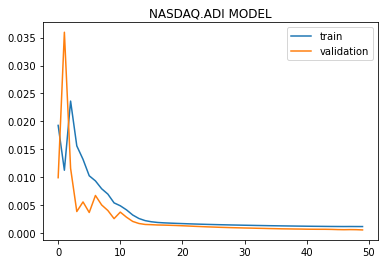

In [56]:
plt.plot(history_ADI.history['loss'], label='train')
plt.plot(history_ADI.history['val_loss'], label='validation')
plt.title("NASDAQ.ADI MODEL") 
plt.legend();

In [57]:
inversed_y_pred_ADI = scaler_ADI.inverse_transform(y_pred_ADI.reshape(-1, 1))
inversed_testY_ADI= scaler_ADI.inverse_transform(testY_ADI.reshape(-1, 1))

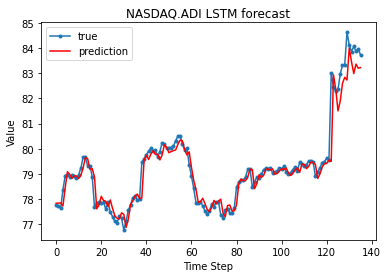

In [58]:
plt.plot(inversed_testY_ADI, marker='.', label="true")
plt.plot(inversed_y_pred_ADI, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.ADI LSTM forecast") 
plt.legend()
plt.show();

In [59]:
rmse_ADI= np.sqrt(mean_squared_error(inversed_testY_ADI, inversed_y_pred_ADI))

## ARIMA MODEL

In [61]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(resampled_df_new['NASDAQ.ADI'].diff().dropna())

ADF Test Statistic : -23.31474453648942
p-value : 0.0
#Lags Used : 0
Number of Observations : 737
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [62]:
from statsmodels.tsa.arima.model import ARIMA
model_ADI=ARIMA(train_arima['NASDAQ.ADI'],order=(1,2,1))
model_fit_ADI=model_ADI.fit()
model_fit_ADI.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             NASDAQ.ADI   No. Observations:                  591
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -267.982
Date:                Fri, 20 Oct 2023   AIC                            541.963
Time:                        02:10:26   BIC                            555.098
Sample:                             0   HQIC                           547.081
                                - 591                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1961      0.028      6.945      0.000       0.141       0.251
ma.L1         -1.0000      0.745     -1.342      0.180      -2.460       0.460
sigma2         0.1440      0.106      1.361      0.173      -0.063       0.351
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6437.74
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.83
Prob(H) (two-sided):                  0.33   Kurtosis:                        19.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
history_ADI = [x for x in train_arima['NASDAQ.ADI']]
# rolling forecasts
predictions_ADI = list()
for i in range(len(test_arima['NASDAQ.ADI'])):
    # predict
    model_ADI = ARIMA(history_ADI, order=(1,1,1))
    model_fit_ADI = model_ADI.fit()
    yhat = model_fit_ADI.forecast()[0]
    # invert transformed prediction
    predictions_ADI.append(yhat)
    # observation
    obs = test_arima['NASDAQ.ADI'][i]
    history_ADI.append(obs)

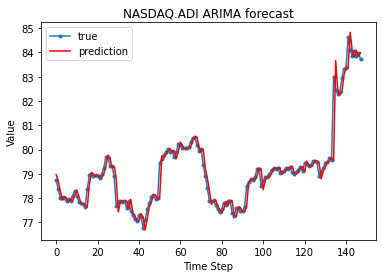

In [64]:
plt.plot(test_arima['NASDAQ.ADI'].values, marker='.', label="true")
plt.plot(predictions_ADI, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.ADI ARIMA forecast") 
plt.legend()
plt.show();

In [65]:
rmse_arima_ADI= np.sqrt(mean_squared_error(test_arima['NASDAQ.ADI'], predictions_ADI))

# NASDAQ.AKAM

In [67]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 12
trainX_AKAM, trainY_AKAM = gen_data(train['NASDAQ.AKAM'], train['NASDAQ.AKAM'], num_steps)
testX_AKAM, testY_AKAM = gen_data(test['NASDAQ.AKAM'], test['NASDAQ.AKAM'], num_steps)

In [68]:
n_features = 1
trainX_AKAM = trainX_AKAM.reshape((trainX_AKAM.shape[0], trainX_AKAM.shape[1], n_features))
testX_AKAM = testX_AKAM.reshape((testX_AKAM.shape[0], testX_AKAM.shape[1], n_features))

## LSTM MODEL

In [69]:
lstm_model_AKAM = keras.Sequential()
lstm_model_AKAM.add(keras.layers.LSTM(1024,input_shape=(12,1)))
lstm_model_AKAM.add(keras.layers.Dense(1))
lstm_model_AKAM.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [70]:
history_AKAM = lstm_model_AKAM.fit(trainX_AKAM, trainY_AKAM, epochs=50, validation_split=0.2,
    batch_size=10, 
    shuffle=False
)

Epoch 1/50
47/47 [==============================] - 8s 143ms/step - loss: 0.0705 - val_loss: 0.0081
Epoch 2/50
47/47 [==============================] - 7s 139ms/step - loss: 0.0099 - val_loss: 0.0084
Epoch 3/50
47/47 [==============================] - 8s 162ms/step - loss: 0.0152 - val_loss: 0.0105
Epoch 4/50
47/47 [==============================] - 7s 144ms/step - loss: 0.0170 - val_loss: 0.0090
Epoch 5/50
47/47 [==============================] - 7s 140ms/step - loss: 0.0145 - val_loss: 0.0082
Epoch 6/50
47/47 [==============================] - 7s 140ms/step - loss: 0.0137 - val_loss: 0.0100
Epoch 7/50
47/47 [==============================] - 7s 147ms/step - loss: 0.0182 - val_loss: 0.0087
Epoch 8/50
47/47 [==============================] - 7s 145ms/step - loss: 0.0171 - val_loss: 0.0094
Epoch 9/50
47/47 [==============================] - 7s 143ms/step - loss: 0.0186 - val_loss: 0.0098
Epoch 10/50
47/47 [==============================] - 7s 145ms/step - loss: 0.0221 - val_loss: 0.0103

In [71]:
y_pred_AKAM=lstm_model_AKAM.predict(testX_AKAM)

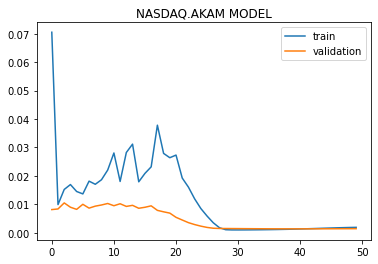

In [72]:
plt.plot(history_AKAM.history['loss'], label='train')
plt.plot(history_AKAM.history['val_loss'], label='validation')
plt.title("NASDAQ.AKAM MODEL") 
plt.legend();

In [73]:
inversed_y_pred_AKAM = scaler_AKAM.inverse_transform(y_pred_AKAM.reshape(-1, 1))
inversed_testY_AKAM= scaler_AKAM.inverse_transform(testY_AKAM.reshape(-1, 1))

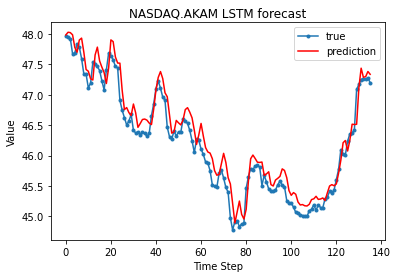

In [74]:
plt.plot(inversed_testY_AKAM, marker='.', label="true")
plt.plot(inversed_y_pred_AKAM, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.AKAM LSTM forecast") 
plt.legend()
plt.show();

In [75]:
rmse_AKAM= np.sqrt(mean_squared_error(inversed_testY_AKAM, inversed_y_pred_AKAM))

## ARIMA MODEL

In [77]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(resampled_df_new['NASDAQ.AKAM'].diff().dropna())

ADF Test Statistic : -24.46231776822006
p-value : 0.0
#Lags Used : 0
Number of Observations : 737
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [78]:
from statsmodels.tsa.arima.model import ARIMA
model_AKAM=ARIMA(train_arima['NASDAQ.AKAM'],order=(1,2,1))
model_fit_AKAM=model_AKAM.fit()
model_fit_AKAM.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            NASDAQ.AKAM   No. Observations:                  591
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -436.029
Date:                Fri, 20 Oct 2023   AIC                            878.058
Time:                        02:17:30   BIC                            891.193
Sample:                             0   HQIC                           883.175
                                - 591                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1019      0.115      0.884      0.377      -0.124       0.328
ma.L1         -1.0000      0.821     -1.218      0.223      -2.609       0.609
sigma2         0.2547      0.209      1.220      0.223      -0.155       0.664
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1044463.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                           -12.73
Prob(H) (two-sided):                  0.00   Kurtosis:                       207.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
history_AKAM = [x for x in train_arima['NASDAQ.AKAM']]
# rolling forecasts
predictions_AKAM = list()
for i in range(len(test_arima['NASDAQ.AKAM'])):
    # predict
    model_AKAM = ARIMA(history_AKAM, order=(1,1,1))
    model_fit_AKAM = model_AKAM.fit()
    yhat = model_fit_AKAM.forecast()[0]
    # invert transformed prediction
    predictions_AKAM.append(yhat)
    # observation
    obs = test_arima['NASDAQ.AKAM'][i]
    history_AKAM.append(obs)

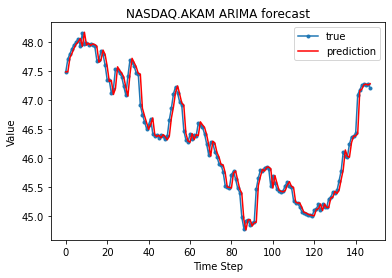

In [80]:
plt.plot(test_arima['NASDAQ.AKAM'].values, marker='.', label="true")
plt.plot(predictions_AKAM, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.AKAM ARIMA forecast")
plt.legend()
plt.show();

In [81]:
rmse_arima_AKAM= np.sqrt(mean_squared_error(test_arima['NASDAQ.AKAM'], predictions_AKAM))

# NASDAQ.DISH

In [82]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 12
trainX_DISH, trainY_DISH = gen_data(train['NASDAQ.DISH'], train['NASDAQ.DISH'], num_steps)
testX_DISH, testY_DISH = gen_data(test['NASDAQ.DISH'], test['NASDAQ.DISH'], num_steps)

In [83]:
n_features = 1
trainX_DISH = trainX_DISH.reshape((trainX_DISH.shape[0], trainX_DISH.shape[1], n_features))
testX_DISH = testX_DISH.reshape((testX_DISH.shape[0], testX_DISH.shape[1], n_features))

## LSTM MODEL

In [84]:
lstm_model_DISH = keras.Sequential()
lstm_model_DISH.add(keras.layers.LSTM(1024,input_shape=(12,1)))
lstm_model_DISH.add(keras.layers.Dense(1))
lstm_model_DISH.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

In [85]:
history_DISH = lstm_model_DISH.fit(trainX_DISH, trainY_DISH, epochs=50, validation_split=0.2,
    batch_size=10, 
    shuffle=False
)

Epoch 1/50
47/47 [==============================] - 10s 181ms/step - loss: 0.0392 - val_loss: 0.0049
Epoch 2/50
47/47 [==============================] - 9s 185ms/step - loss: 0.0102 - val_loss: 0.0024
Epoch 3/50
47/47 [==============================] - 9s 187ms/step - loss: 0.0087 - val_loss: 0.0021
Epoch 4/50
47/47 [==============================] - 7s 156ms/step - loss: 0.0085 - val_loss: 0.0022
Epoch 5/50
47/47 [==============================] - 6s 135ms/step - loss: 0.0085 - val_loss: 0.0023
Epoch 6/50
47/47 [==============================] - 7s 157ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 7/50
47/47 [==============================] - 7s 157ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 8/50
47/47 [==============================] - 7s 142ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 9/50
47/47 [==============================] - 7s 151ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 10/50
47/47 [==============================] - 9s 197ms/step - loss: 0.0036 - val_loss: 0.001

In [86]:
y_pred_DISH=lstm_model_DISH.predict(testX_DISH)

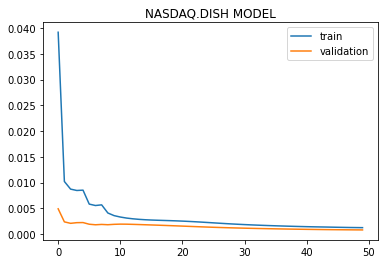

In [87]:
plt.plot(history_DISH.history['loss'], label='train')
plt.plot(history_DISH.history['val_loss'], label='validation')
plt.title("NASDAQ.DISH MODEL") 
plt.legend();

In [88]:
inversed_y_pred_DISH = scaler_DISH.inverse_transform(y_pred_DISH.reshape(-1, 1))
inversed_testY_DISH= scaler_DISH.inverse_transform(testY_DISH.reshape(-1, 1))

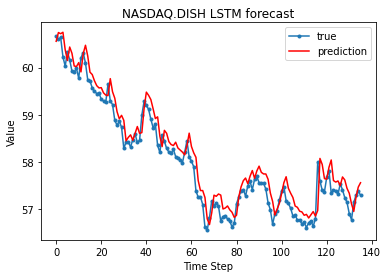

In [89]:
plt.plot(inversed_testY_DISH, marker='.', label="true")
plt.plot(inversed_y_pred_DISH, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.DISH LSTM forecast") 
plt.legend()
plt.show();

In [90]:
rmse_DISH= np.sqrt(mean_squared_error(inversed_testY_DISH, inversed_y_pred_DISH))

## ARIMA MODEL

In [91]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(resampled_df_new['NASDAQ.DISH'].diff().dropna())

ADF Test Statistic : -22.23428878988927
p-value : 0.0
#Lags Used : 0
Number of Observations : 737
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [92]:
from statsmodels.tsa.arima.model import ARIMA
model_DISH=ARIMA(train_arima['NASDAQ.DISH'],order=(1,2,1))
model_fit_DISH=model_DISH.fit()
model_fit_DISH.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            NASDAQ.DISH   No. Observations:                  591
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -120.034
Date:                Fri, 20 Oct 2023   AIC                            246.068
Time:                        02:25:50   BIC                            259.203
Sample:                             0   HQIC                           251.185
                                - 591                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2265      0.042      5.421      0.000       0.145       0.308
ma.L1         -1.0000      2.068     -0.484      0.629      -5.052       3.052
sigma2         0.0871      0.180      0.484      0.628      -0.266       0.440
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               761.34
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
history_DISH = [x for x in train_arima['NASDAQ.DISH']]
# rolling forecasts
predictions_DISH = list()
for i in range(len(test_arima['NASDAQ.DISH'])):
    # predict
    model_DISH = ARIMA(history_DISH, order=(1,1,1))
    model_fit_DISH = model_DISH.fit()
    yhat = model_fit_DISH.forecast()[0]
    # invert transformed prediction
    predictions_DISH.append(yhat)
    # observation
    obs = test_arima['NASDAQ.DISH'][i]
    history_DISH.append(obs)

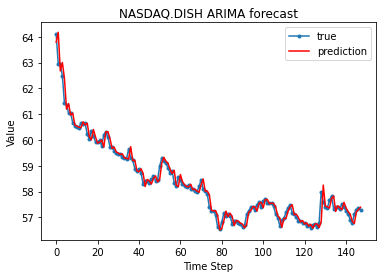

In [94]:
plt.plot(test_arima['NASDAQ.DISH'].values, marker='.', label="true")
plt.plot(predictions_DISH, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title("NASDAQ.DISH ARIMA forecast") 
plt.legend()
plt.show();

In [95]:
rmse_arima_DISH= np.sqrt(mean_squared_error(test_arima['NASDAQ.DISH'], predictions_DISH))

## RMSE COMPARISON 

In [96]:
# Initialize data to Dicts of series. 
d = {'LSTM': pd.Series([rmse_SP,rmse_AAL, rmse_ADI,rmse_AKAM,rmse_DISH], 
                      index=['SP500', 'NASDAQ.AAL','NASDAQ.ADI', 'NASDAQ.AKAM', 'NASDAQ.DISH']), 
     'ARIMA': pd.Series([rmse_arima_SP,rmse_arima_AAL, rmse_arima_ADI,rmse_arima_AKAM,rmse_arima_DISH], 
                      index=['SP500', 'NASDAQ.AAL','NASDAQ.ADI', 'NASDAQ.AKAM', 'NASDAQ.DISH'])} 
  
# creates Dataframe. 
comparision_matrix = pd.DataFrame(d) 

In [97]:
comparision_matrix

,LSTM,ARIMA
SP500,6.141523,3.836510
NASDAQ.AAL,0.590920,0.213643
NASDAQ.ADI,0.485054,0.427133
NASDAQ.AKAM,0.231004,0.155847
NASDAQ.DISH,0.303877,0.263540
